###Методичка

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn import datasets

In [ ]:
data = datasets.load_breast_cancer()
X = data.data[:, :2]
y = data.target

In [ ]:
df = pd.DataFrame(data.data[:, :2], columns=data.feature_names[:2])
df['target'] = data.target
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

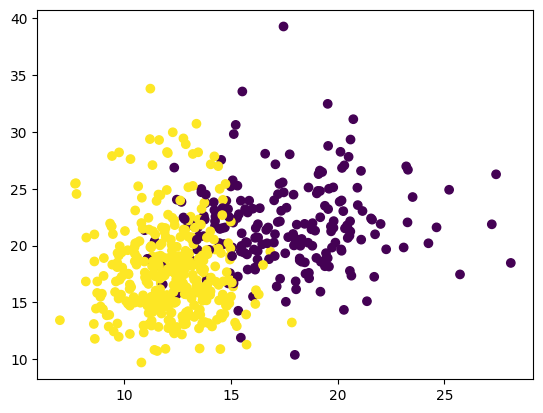

In [ ]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y)
plt.show()

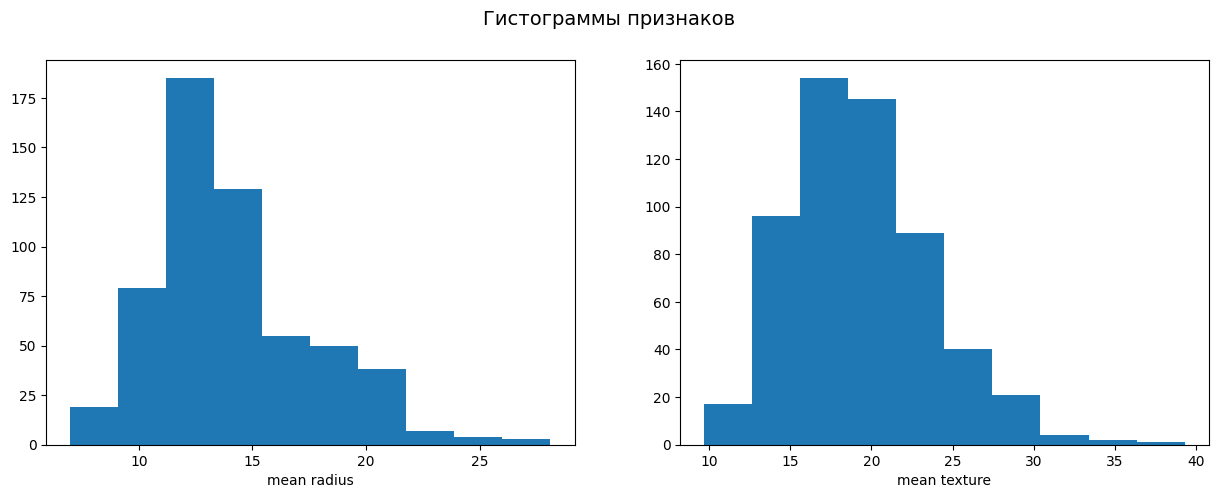

In [ ]:
plt.figure(figsize=(15, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.hist(X[:, i])
    plt.xlabel(data.feature_names[i])
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [ ]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X, y)

GaussianNB()

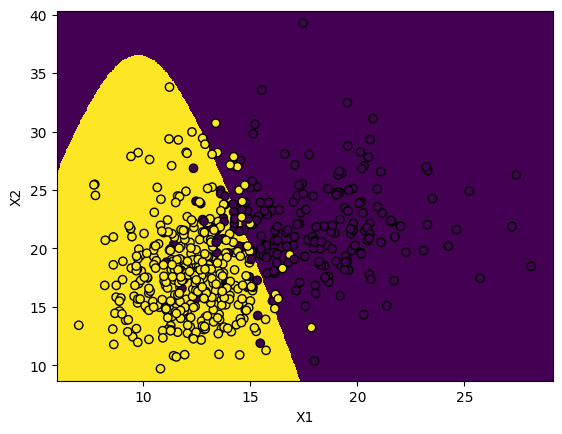

In [ ]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = gaussian_nb.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
y_pred = gaussian_nb.predict(X)

In [ ]:
print('Accuarcy = ', accuracy_score(y, y_pred))
print('F1_score = ', f1_score(y, y_pred))
print(confusion_matrix(y, y_pred))

Accuarcy =  0.8857644991212654
F1_score =  0.9127516778523489
[[164  48]
 [ 17 340]]


###Самостоятельное задание

1. На использованном в работе наборе данных примените другие вариации модели наивного Байеса - Мультономиальный, Бернулли, категориальные и комплементарный. Для каждой модели сделайте вывод о ее применимости.

In [ ]:
X_1 = data.data
y_1 = data.target

In [ ]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, CategoricalNB, ComplementNB

In [ ]:
models = { 'Наивный Гауссовский Байес': GaussianNB(),
          'Наивный Байес Бернули': BernoulliNB(),
          'Мультиномиальный наивный Байес': MultinomialNB(),
          'Категориальный наивный Байес': CategoricalNB(),
          'Комплиментарный наивный Байес': ComplementNB()
          }

In [ ]:
import seaborn as sns

In [ ]:
def learn_models(models, X_1, y_1):
  for name, model in models.items():
    model.fit(X_1, y_1)

    y_pred = model.predict(X_1)
    print(name)
    print('Accuarcy = ', accuracy_score(y_1, y_pred))
    print('F1_score = ', f1_score(y_1, y_pred))
    print(confusion_matrix(y_1, y_pred), '\n')

In [ ]:
learn_models(models, X_1, y_1)

Наивный Гауссовский Байес
Accuarcy =  0.9420035149384886
F1_score =  0.9546079779917468
[[189  23]
 [ 10 347]] 

Наивный Байес Бернули
Accuarcy =  0.6274165202108963
F1_score =  0.7710583153347732
[[  0 212]
 [  0 357]] 

Мультиномиальный наивный Байес
Accuarcy =  0.8963093145869947
F1_score =  0.9216467463479415
[[163  49]
 [ 10 347]] 

Категориальный наивный Байес
Accuarcy =  0.9595782073813708
F1_score =  0.9685362517099864
[[192  20]
 [  3 354]] 

Комплиментарный наивный Байес
Accuarcy =  0.8945518453427065
F1_score =  0.9202127659574469
[[163  49]
 [ 11 346]] 



2. Загрузите набор данных о выживших на титанике, прилагающийся к этой работе. Повторите на нем моделирование из методических указаний. Попробуйте разные варианты байесовского классификатора в зависимости от форм расрпеделния эмпирических данных.

In [ ]:
data_titanic = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2024/ML3.6%20bayes/titanic.csv')
data_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0,0,1
887,888,1,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,1,29.0,1,2,23.4500,0,0,1
889,890,1,1,0,26.0,0,0,30.0000,1,0,0


In [ ]:
X_titanic = data_titanic.drop(['Survived', 'PassengerId'], axis=1)
y_titanic = data_titanic.Survived

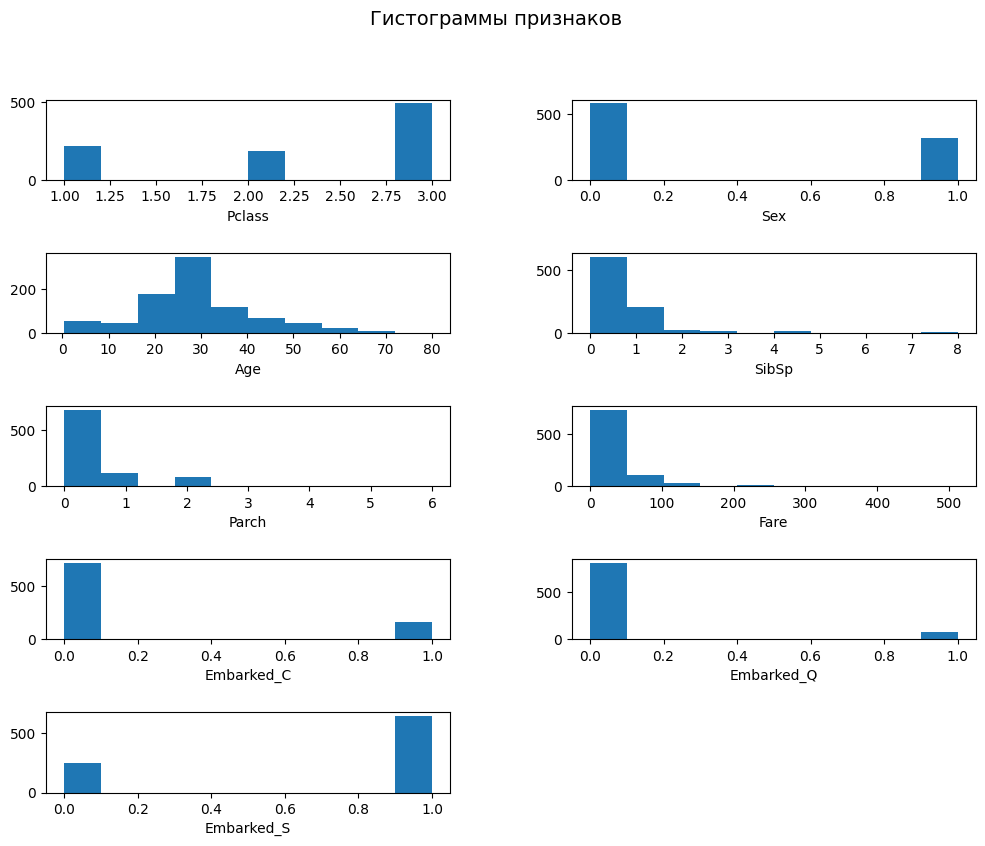

In [ ]:
f = plt.figure(figsize=(12, 9))
for i in range(9):
    plt.subplot(5, 2, i+1)
    plt.hist(np.array(X_titanic)[:, i])

    plt.xlabel(X_titanic.columns[i])
f.subplots_adjust(hspace=0.9,wspace=0.3)
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [ ]:
learn_models(models, X_titanic, y_titanic)

Наивный Гауссовский Байес
Accuarcy =  0.7867564534231201
F1_score =  0.7230320699708455
[[453  96]
 [ 94 248]] 

Наивный Байес Бернули
Accuarcy =  0.7845117845117845
F1_score =  0.7159763313609468
[[457  92]
 [100 242]] 

Мультиномиальный наивный Байес
Accuarcy =  0.6891133557800224
F1_score =  0.534453781512605
[[455  94]
 [183 159]] 

Категориальный наивный Байес
Accuarcy =  0.8148148148148148
F1_score =  0.7425897035881435
[[488  61]
 [104 238]] 

Комплиментарный наивный Байес
Accuarcy =  0.6936026936026936
F1_score =  0.5457570715474209
[[454  95]
 [178 164]] 



In [ ]:
X_titanic_rm = X_titanic.drop(['Age'], axis=1)

learn_models(models, X_titanic_rm, y_titanic)

Наивный Гауссовский Байес
Accuarcy =  0.7822671156004489
F1_score =  0.7196531791907513
[[448 101]
 [ 93 249]] 

Наивный Байес Бернули
Accuarcy =  0.7845117845117845
F1_score =  0.7159763313609468
[[457  92]
 [100 242]] 

Мультиномиальный наивный Байес
Accuarcy =  0.6924803591470258
F1_score =  0.5243055555555556
[[466  83]
 [191 151]] 

Категориальный наивный Байес
Accuarcy =  0.8002244668911336
F1_score =  0.720125786163522
[[484  65]
 [113 229]] 

Комплиментарный наивный Байес
Accuarcy =  0.6980920314253648
F1_score =  0.5401709401709403
[[464  85]
 [184 158]] 



3. Загрузите набор данных о Титанике с сайта Kaggle. Обратите внимание на обилие категориальных переменных. Примените на нем наивный байесовский классификатор.

In [ ]:
titanic_dt = pd.read_csv('Titanic-Dataset.csv')
titanic_dt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
from sklearn.preprocessing import OrdinalEncoder # Для кодировки параметра используем порядковое кодирование
ord_enc = OrdinalEncoder()

sex_for_code = np.array(titanic_dt['Sex']) # Создаем массив с категориальными данными для их изменение
embarked_for_code = np.array(titanic_dt['Embarked'])

titanic_dt["Sex"] = ord_enc.fit_transform(sex_for_code.reshape(-1, 1))
titanic_dt["Embarked"] = ord_enc.fit_transform(embarked_for_code.reshape(-1, 1))

titanic_dt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1.0,27.0,0,0,211536,13.0000,NaN,2.0
887,888,1,1,"Graham, Miss. Margaret Edith",0.0,19.0,0,0,112053,30.0000,B42,2.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,NaN,1,2,W./C. 6607,23.4500,NaN,2.0
889,890,1,1,"Behr, Mr. Karl Howell",1.0,26.0,0,0,111369,30.0000,C148,0.0


In [ ]:
titanic_dt.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_dt['Age'] = titanic_dt['Age'].fillna(titanic_dt['Age'].mean().round(0))
titanic_dt['Embarked'] = titanic_dt['Embarked'].fillna(titanic_dt['Embarked'].max())
titanic_dt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1.0,27.0,0,0,211536,13.0000,NaN,2.0
887,888,1,1,"Graham, Miss. Margaret Edith",0.0,19.0,0,0,112053,30.0000,B42,2.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,30.0,1,2,W./C. 6607,23.4500,NaN,2.0
889,890,1,1,"Behr, Mr. Karl Howell",1.0,26.0,0,0,111369,30.0000,C148,0.0


In [ ]:
X_t = titanic_dt.drop(['PassengerId','Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y_t = titanic_dt.Survived

In [ ]:
learn_models(models, X_t, y_t)

Наивный Гауссовский Байес
Accuarcy =  0.792368125701459
F1_score =  0.7291361639824304
[[457  92]
 [ 93 249]] 

Наивный Байес Бернули
Accuarcy =  0.7856341189674523
F1_score =  0.7127819548872181
[[463  86]
 [105 237]] 

Мультиномиальный наивный Байес
Accuarcy =  0.6891133557800224
F1_score =  0.534453781512605
[[455  94]
 [183 159]] 

Категориальный наивный Байес
Accuarcy =  0.8181818181818182
F1_score =  0.7460815047021944
[[491  58]
 [104 238]] 

Комплиментарный наивный Байес
Accuarcy =  0.6868686868686869
F1_score =  0.5342237061769616
[[452  97]
 [182 160]] 



###Доп задания

1. Напишите универсальную функцию рисования произвольного количества гистограмм, которую можно применить к любому датасету.

In [ ]:
def draw_hist(X, x_size=15, y_size=7):
  f = plt.figure(figsize=(x_size, y_size))
  for i in range(len(X.columns)):
      plt.subplot(5, 2, i+1)
      plt.hist(np.array(X)[:, i])

      plt.xlabel(X.columns[i])
  f.subplots_adjust(hspace=0.9,wspace=0.3)
  plt.suptitle('Гистограммы признаков',fontsize=14)
  plt.show()

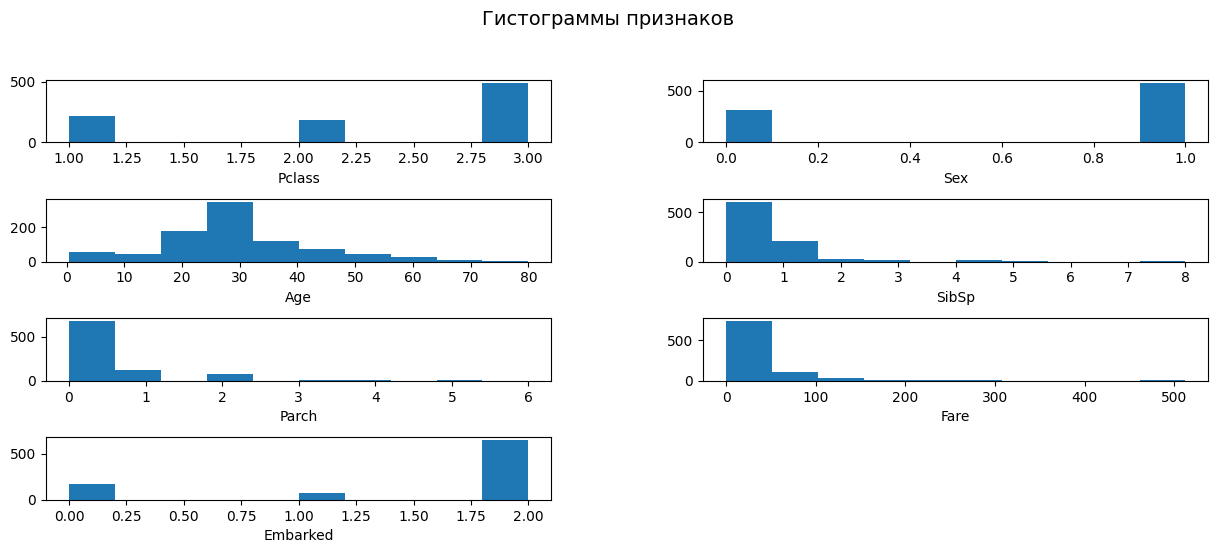

In [ ]:
draw_hist(X_t)

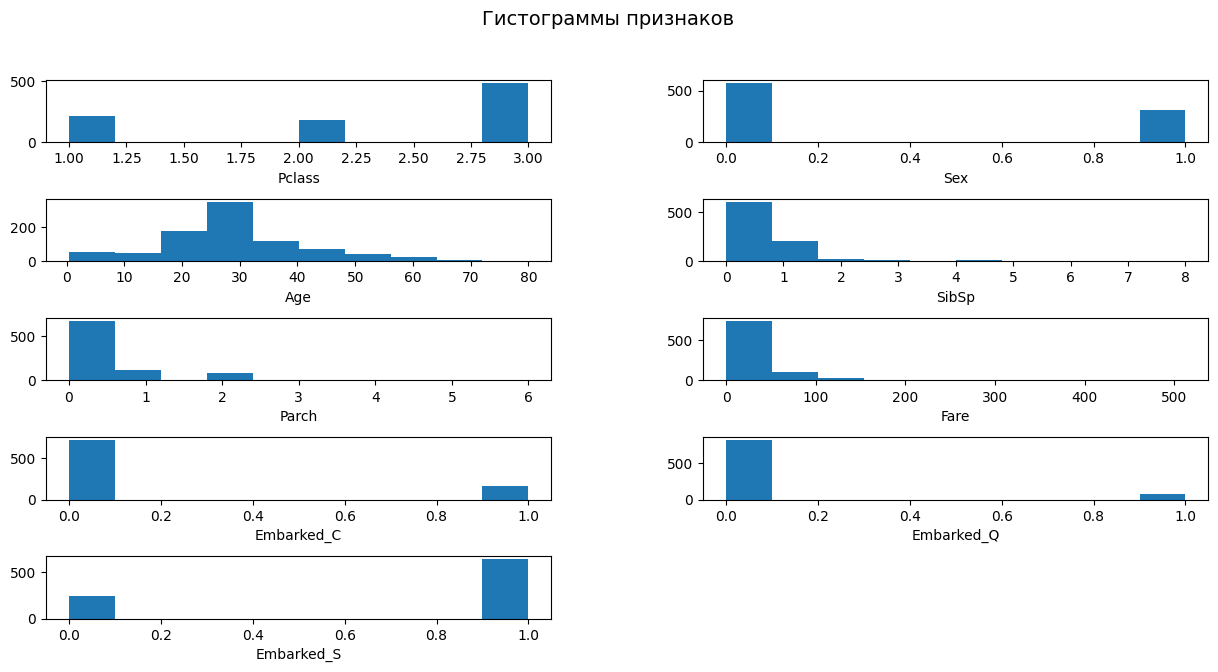

In [ ]:
draw_hist(X_titanic)

2. Используйте проверку статистических гипотез о виде распределения, чтобы выбирать вид непрерывного распределения более строго.

In [ ]:
from scipy.stats import kstest
from scipy import stats
import itertools

In [ ]:
def test_norm_distr(X, conf_level=0.05):
  for col in range(len(X.columns)):
    result = kstest(np.array(X)[:,col], 'norm')
    if result.pvalue >  conf_level:
      print(f'Данные столбца "{X.columns[col]}" распределены нормально \n')
    else:
      print(f'Данные столбца "{X.columns[col]}" не имеют нормальное распредление \n')

In [ ]:
test_norm_distr(X_titanic)

Данные столбца "Pclass" не имеют нормальное распредление 

Данные столбца "Sex" не имеют нормальное распредление 

Данные столбца "Age" не имеют нормальное распредление 

Данные столбца "SibSp" не имеют нормальное распредление 

Данные столбца "Parch" не имеют нормальное распредление 

Данные столбца "Fare" не имеют нормальное распредление 

Данные столбца "Embarked_C" не имеют нормальное распредление 

Данные столбца "Embarked_Q" не имеют нормальное распредление 

Данные столбца "Embarked_S" не имеют нормальное распредление 



In [ ]:
def test_distr(X):
  for col in range(len(X.columns)):
    theor_x_norm = stats.norm.pdf(np.array(X)[:, col])
    res = stats.chisquare(f_obs=np.array(X)[:, col], f_exp=theor_x_norm)

    print(res)

In [ ]:
test_distr(X_titanic)

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
30.952875939661148